In [1]:
import numpy as np
import pandas as pd 

In [2]:
match=pd.read_csv('./dataset/match.csv')
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
match.shape

(950, 20)

In [4]:
ball=pd.read_csv('./dataset/ball.csv')
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [5]:
ball.shape

(225954, 17)

In [6]:
a = match[['ID', 'Team1', 'Team2']]
b = ball[['ID', 'innings', 'BattingTeam']].drop_duplicates()
c=pd.merge(a,b,on='ID')
c["BowlingTeam"]=np.where(c['BattingTeam']==c['Team1'],c['Team2'],c['Team1'])
c.head()

,ID,Team1,Team2,innings,BattingTeam,BowlingTeam
0,1312200,Rajasthan Royals,Gujarat Titans,1,Rajasthan Royals,Gujarat Titans
1,1312200,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals
2,1312199,Royal Challengers Bangalore,Rajasthan Royals,1,Royal Challengers Bangalore,Rajasthan Royals
3,1312199,Royal Challengers Bangalore,Rajasthan Royals,2,Rajasthan Royals,Royal Challengers Bangalore
4,1312198,Royal Challengers Bangalore,Lucknow Super Giants,1,Royal Challengers Bangalore,Lucknow Super Giants


In [7]:
score = ball.groupby(['ID', 'innings'])[['total_run', 'isWicketDelivery']].sum().reset_index()
score

,ID,innings,total_run,isWicketDelivery
0,335982,1,222,3
1,335982,2,82,10
2,335983,1,240,5
3,335983,2,207,4
4,335984,1,129,8
...,...,...,...,...
1923,1312198,2,193,6
1924,1312199,1,157,8
1925,1312199,2,161,3
1926,1312200,1,130,9


In [8]:
first_innings = score[score['innings']==1]
first_innings = first_innings.rename(columns={'total_run':'first_innings', 'isWicketDelivery':'first_innings_wicket'})
first_innings.drop(['innings'], axis=1, inplace=True)
first_innings

,ID,first_innings,first_innings_wicket
0,335982,222,3
2,335983,240,5
4,335984,129,8
6,335985,165,7
8,335986,110,10
...,...,...,...
1918,1304116,157,8
1920,1312197,188,6
1922,1312198,207,4
1924,1312199,157,8


In [9]:
second_innings = score[score['innings']==2]
second_innings = second_innings.rename(columns={'total_run':'second_innings', 'isWicketDelivery':'second_innings_wicket'})
second_innings.drop(['innings'], axis=1, inplace=True)
second_innings

,ID,second_innings,second_innings_wicket
1,335982,82,10
3,335983,207,4
5,335984,132,1
7,335985,166,5
9,335986,112,5
...,...,...,...
1919,1304116,160,5
1921,1312197,191,3
1923,1312198,193,6
1925,1312199,161,3


In [10]:
c.shape

(1928, 6)

In [11]:
score = pd.merge(first_innings, second_innings, on='ID')
score = pd.merge(c, score, on='ID')
match = pd.merge(match, score, on='ID')
match.shape

(1926, 29)

In [12]:
match=match[match['innings']==2]
match.drop(['innings'],axis=1,inplace=True)
match=match[match["method"]!="D/L"]

In [13]:
match["result"]=np.where(match["WinningTeam"]==match["BattingTeam"], 1, 0)
match["target"]=match["first_innings"]+1

In [14]:
match.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1_x', 'Team2_x',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'Team1_y', 'Team2_y',
       'BattingTeam', 'BowlingTeam', 'first_innings', 'first_innings_wicket',
       'second_innings', 'second_innings_wicket', 'result', 'target'],
      dtype='object')

In [15]:
match=match[['ID', 'Venue',"BattingTeam",'BowlingTeam','target','second_innings','second_innings_wicket','result']]
match.head()

,ID,Venue,BattingTeam,BowlingTeam,target,second_innings,second_innings_wicket,result
1,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1
3,1312199,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Royal Challengers Bangalore,158,161,3,1
5,1312198,"Eden Gardens, Kolkata",Lucknow Super Giants,Royal Challengers Bangalore,208,193,6,0
7,1312197,"Eden Gardens, Kolkata",Gujarat Titans,Rajasthan Royals,189,191,3,1
9,1304116,"Wankhede Stadium, Mumbai",Punjab Kings,Sunrisers Hyderabad,158,160,5,1


In [16]:
match['BattingTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [17]:
match['BattingTeam']=match['BattingTeam'].str.replace("Kings XI Punjab", "Punjab Kings")
match['BattingTeam']=match['BattingTeam'].str.replace("Delhi Daredevils", "Delhi Capitals")
match['BattingTeam']=match['BattingTeam'].str.replace("Deccan Chargers", "Sunrisers Hyderabad")
match['BowlingTeam']=match['BowlingTeam'].str.replace("Kings XI Punjab", "Punjab Kings")
match['BowlingTeam']=match['BowlingTeam'].str.replace("Delhi Daredevils", "Delhi Capitals")
match['BowlingTeam']=match['BowlingTeam'].str.replace("Deccan Chargers", "Sunrisers Hyderabad")

In [18]:
teams=['Rajasthan Royals', 'Royal Challengers Bangalore','Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings','Lucknow Super Giants','Gujarat Titans', 'Kolkata Knight Riders','Punjab Kings', 'Mumbai Indians']
match=match[match['BattingTeam'].isin(teams) & match['BowlingTeam'].isin(teams)]

In [19]:
match["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Wankhede Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Rajiv Gandhi Intern

In [20]:
stadiums = ['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata', 'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai', 'Dr DY Patil Sports Academy, Mumbai', 'Maharashtra Cricket Association Stadium, Pune', 'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium', 'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi', 'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium', 'Rajiv Gandhi International Stadium', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'MA Chidambaram Stadium', 'Punjab Cricket Association IS Bindra Stadium', 'Wankhede Stadium', 'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium', 'Maharashtra Cricket Association Stadium', 'Holkar Cricket Stadium', 'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Rajiv Gandhi International Stadium, Uppal', 'Shaheed Veer Narayan Singh International Stadium', 'JSCA International Stadium Complex', 'Brabourne Stadium', 'Punjab Cricket Association Stadium, Mohali', 'MA Chidambaram Stadium, Chepauk', 'Sardar Patel Stadium, Motera', 'Barabati Stadium', 'Himachal Pradesh Cricket Association Stadium', 'Subrata Roy Sahara Stadium', 'Dr DY Patil Sports Academy', 'Vidarbha Cricket Association Stadium, Jamtha', 'New Wanderers Stadium', 'SuperSport Park', 'Kingsmead', 'OUTsurance Oval', "St George's Park", 'De Beers Diamond Oval', 'Buffalo Park', 'Newlands']
stadiums.sort()
stadiums

['Arun Jaitley Stadium',
 'Arun Jaitley Stadium, Delhi',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Brabourne Stadium, Mumbai',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr DY Patil Sports Academy, Mumbai',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Eden Gardens, Kolkata',
 'Feroz Shah Kotla',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'M.Chinnaswamy Stadium',
 'MA Chidambaram Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'MA Chidambaram Stadium, Chepauk, Chennai',
 'Maharashtra Cricket Association Stadium',
 'Maharashtra Cricket Association Stadium, Pune',
 'Narendra Modi Stadium, Ahmedabad',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association IS Bindra Stadium',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Punjab Cri

In [21]:
stadium_mapping = {
    'Arun Jaitley Stadium':'Arun Jaitley Stadium, Delhi',
    'Barabati Stadium':'Barabati Stadium, Cuttack',
    'Brabourne Stadium':'Brabourne Stadium, Mumbai',
    'Buffalo Park':'Buffalo Park, East London',
    'De Beers Diamond Oval':'De Beers Diamond Oval, Kimberley',
    'Dr DY Patil Sports Academy':'Dr DY Patil Sports Academy, Mumbai',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Eden Gardens':'Eden Gardens, Kolkata',
    'Feroz Shah Kotla':'Arun Jaitley Stadium, Delhi',
    'Holkar Cricket Stadium':'Holkar Cricket Stadium, Indore',
    'JSCA International Stadium Complex':'JSCA International Stadium Complex, Ranchi',
    'Kingsmead':'Kingsmead, Durban',
    'M Chinnaswamy Stadium':'M Chinnaswamy Stadium, Bangalore',
    'M. Chinnaswamy Stadium':'M Chinnaswamy Stadium, Bangalore',
    'MA Chidambaram Stadium':'MA Chidambaram Stadium, Chepauk, Chennai',
    'MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium, Chepauk, Chennai',
    'Maharashtra Cricket Association Stadium':'Maharashtra Cricket Association Stadium, Pune',
    'New Wanderers Stadium':'New Wanderers Stadium, Johannesburg',
    'Newlands':'Newlands, Cape Town',
    'OUTsurance Oval':'OUTsurance Oval, Bloemfontein',
    'Punjab Cricket Association IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association , Mohali':'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Rajiv Gandhi International Stadium':'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
    'Sardar Patel Stadium, Motera':'Narendra Modi Stadium, Ahmedabad',
    'Sawai Mansingh Stadium':'Sawai Mansingh Stadium, Jaipur',
    'Shaheed Veer Narayan Singh International Stadium':'Shaheed Veer Narayan Singh International Stadium, Raipur',
    'Sharjah Cricket Stadium':'Sharjah Cricket Stadium, Sharjah',
    'Sheikh Zayed Stadium':'Sheikh Zayed Stadium, Abu Dhabi',
    'St George\'s Park':'St George\'s Park, Port Elizabeth',
    'Subrata Roy Sahara Stadium':'Maharashtra Cricket Association Stadium, Pune',
    'SuperSport Park':'SuperSport Park, Centurion',
    'Vidarbha Cricket Association Stadium, Jamtha':'Vidarbha Cricket Association Stadium, Jamtha, Nagpur',
    'Wankhede Stadium':'Wankhede Stadium, Mumbai',
    'Zayed Cricket Stadium, Abu Dhabi':'Sheikh Zayed Stadium, Abu Dhabi',
}

match['Venue'] = match['Venue'].map(stadium_mapping).fillna(match['Venue'])

In [22]:
ball.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [23]:
ball=ball[['ID', 'innings','overs', 'ballnumber','total_run', 'isWicketDelivery']]
ball=pd.merge(match,ball, on='ID')
ball.head()

,ID,Venue,BattingTeam,BowlingTeam,target,second_innings,second_innings_wicket,result,innings,overs,ballnumber,total_run,isWicketDelivery
0,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,1,0,1,0,0
1,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,1,0,2,1,0
2,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,1,0,3,1,0
3,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,1,0,4,0,0
4,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,1,0,5,0,0


In [24]:
ball=ball[ball['innings']==2]
ball["score"]=ball.groupby(["ID","innings"])["total_run"].cumsum()
ball

,ID,Venue,BattingTeam,BowlingTeam,target,second_innings,second_innings_wicket,result,innings,overs,ballnumber,total_run,isWicketDelivery,score
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,1,0,0,0
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,2,0,0,0
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,3,1,0,1
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,4,0,0,1
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196321,335982,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,82,10,0,2,14,5,1,0,80
196322,335982,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,82,10,0,2,14,6,1,0,81
196323,335982,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,82,10,0,2,14,7,0,0,81
196324,335982,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,82,10,0,2,15,1,1,0,82


In [25]:
ball["runs_req"] = ball["target"] - ball["score"]
ball["balls_left"] = 120 - (ball["overs"]*6 + ball["ballnumber"])
ball

,ID,Venue,BattingTeam,BowlingTeam,target,second_innings,second_innings_wicket,result,innings,overs,ballnumber,total_run,isWicketDelivery,score,runs_req,balls_left
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,1,0,0,0,131,119
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,2,0,0,0,131,118
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,3,1,0,1,130,117
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,4,0,0,1,130,116
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,5,0,0,1,130,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196321,335982,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,82,10,0,2,14,5,1,0,80,143,31
196322,335982,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,82,10,0,2,14,6,1,0,81,142,30
196323,335982,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,82,10,0,2,14,7,0,0,81,142,29
196324,335982,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,82,10,0,2,15,1,1,0,82,141,29


In [26]:
wickets = ball.groupby(["ID", "innings"])["isWicketDelivery"].cumsum()
ball["wickets_left"]=10-wickets
ball["crr"]=ball["score"]/((ball["overs"]*6 + ball["ballnumber"])/6)
ball["rrr"]=ball["runs_req"]/ball["balls_left"]*6
ball.head()

,ID,Venue,BattingTeam,BowlingTeam,target,second_innings,second_innings_wicket,result,innings,overs,ballnumber,total_run,isWicketDelivery,score,runs_req,balls_left,wickets_left,crr,rrr
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,1,0,0,0,131,119,10,0.0,6.605042
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,2,0,0,0,131,118,10,0.0,6.661017
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,3,1,0,1,130,117,10,2.0,6.666667
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,4,0,0,1,130,116,10,1.5,6.724138
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,133,3,1,2,0,5,0,0,1,130,115,10,1.2,6.782609


In [27]:
ball=ball[ball['balls_left']>0]

In [28]:
ball.columns

Index(['ID', 'Venue', 'BattingTeam', 'BowlingTeam', 'target', 'second_innings',
       'second_innings_wicket', 'result', 'innings', 'overs', 'ballnumber',
       'total_run', 'isWicketDelivery', 'score', 'runs_req', 'balls_left',
       'wickets_left', 'crr', 'rrr'],
      dtype='object')

In [29]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94663 entries, 120 to 196325
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     94663 non-null  int64  
 1   Venue                  94663 non-null  object 
 2   BattingTeam            94663 non-null  object 
 3   BowlingTeam            94663 non-null  object 
 4   target                 94663 non-null  int64  
 5   second_innings         94663 non-null  int64  
 6   second_innings_wicket  94663 non-null  int64  
 7   result                 94663 non-null  int32  
 8   innings                94663 non-null  int64  
 9   overs                  94663 non-null  int64  
 10  ballnumber             94663 non-null  int64  
 11  total_run              94663 non-null  int64  
 12  isWicketDelivery       94663 non-null  int64  
 13  score                  94663 non-null  int64  
 14  runs_req               94663 non-null  int64  
 15  ball

In [30]:
data=ball[['Venue', 'BattingTeam', 'BowlingTeam','target', 'runs_req', 'balls_left', 'wickets_left', 'crr', 'rrr', 'result']]
data

,Venue,BattingTeam,BowlingTeam,target,runs_req,balls_left,wickets_left,crr,rrr,result
120,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,131,119,10,0.000000,6.605042,1
121,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,131,118,10,0.000000,6.661017,1
122,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,130,117,10,2.000000,6.666667,1
123,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,130,116,10,1.500000,6.724138,1
124,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,130,115,10,1.200000,6.782609,1
...,...,...,...,...,...,...,...,...,...,...
196321,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,143,31,1,5.393258,27.677419,0
196322,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,142,30,1,5.400000,28.400000,0
196323,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,142,29,1,5.340659,29.379310,0
196324,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,223,141,29,1,5.406593,29.172414,0


In [31]:
data=data.sample(data.shape[0], random_state=42)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [33]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [35]:
x_train

,Venue,BattingTeam,BowlingTeam,target,runs_req,balls_left,wickets_left,crr,rrr
139499,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,Punjab Kings,169,102,53,7,6.000000,11.547170
162419,"MA Chidambaram Stadium, Chepauk, Chennai",Rajasthan Royals,Chennai Super Kings,247,179,79,10,9.951220,13.594937
108587,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Sunrisers Hyderabad,158,78,55,9,7.384615,8.509091
77029,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Punjab Kings,139,67,54,5,6.545455,7.444444
167578,"Barabati Stadium, Cuttack",Punjab Kings,Sunrisers Hyderabad,171,120,68,6,5.884615,10.588235
...,...,...,...,...,...,...,...,...,...
130063,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,131,44,31,6,5.865169,8.516129
6652,"Wankhede Stadium, Mumbai",Kolkata Knight Riders,Rajasthan Royals,153,121,84,8,5.333333,8.642857
147568,"Wankhede Stadium, Mumbai",Mumbai Indians,Sunrisers Hyderabad,136,85,57,7,4.857143,8.947368
115793,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,116,37,39,7,5.851852,5.692308


In [36]:
y_train

139499    1
162419    0
108587    1
77029     0
167578    0
         ..
130063    1
6652      1
147568    0
115793    1
83231     1
Name: result, Length: 75730, dtype: int32

In [37]:
trf=ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False, drop='first'), ['Venue', 'BattingTeam', 'BowlingTeam'])
], remainder='passthrough')

In [38]:
pipe=Pipeline([
    ('trf', trf),
    ('lr', LogisticRegression())
])

In [39]:
pipe.fit(x_train, y_train)

c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Venue', 'BattingTeam',
                                                   'BowlingTeam'])])),
                ('lr', LogisticRegression())])

In [40]:
y_pred=pipe.predict(x_test)
accuracy_score(y_test, y_pred)

0.8057360164791634

In [41]:
pipe.predict_proba(x_test)[3]

array([0.89706228, 0.10293772])

In [42]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  
#     'lr__penalty': ['l1', 'l2'],  
#     'lr__solver': ['liblinear','sag', 'saga'], 
# }
# grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(x_train, y_train)
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", accuracy)

In [43]:
pipe=Pipeline([
    ('trf', trf),
    ('lr', LogisticRegression(solver='liblinear',C=0.1, penalty='l1'))
])

In [44]:
pipe.fit(x_train, y_train)

c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Venue', 'BattingTeam',
                                                   'BowlingTeam'])])),
                ('lr',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [45]:
y_pred=pipe.predict(x_test)
accuracy_score(y_test, y_pred)

0.8112290709343475

In [46]:
def match_progression(data, id, pipe):
    match = data[data['ID'] == id]
    match = match[match['ballnumber'] == 6]
    columns = ['Venue', 'BattingTeam', 'BowlingTeam', 'target', 'runs_req', 'balls_left', 'wickets_left', 'crr', 'rrr']
    temp_df = match[columns].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result[:, 0] * 100, 1)
    temp_df['win'] = np.round(result[:, 1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    target = temp_df['target'].values[0]
    temp_df['runs_after_over'] = -1 * np.diff([target] + list(temp_df['runs_req']))
    temp_df['wickets_in_over'] = -1 * np.diff([10] + list(temp_df['wickets_left']))[:temp_df.shape[0]]
    print("Target:", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target


In [47]:
temp_df,target = match_progression(ball,336028,pipe)
temp_df

Target: 190


,end_of_over,runs_after_over,wickets_in_over,lose,win
186390,1,9,0,63.6,36.4
186399,2,21,0,40.8,59.2
186406,3,6,1,52.1,47.9
186412,4,4,0,53.6,46.4
186418,5,16,0,37.1,62.9
186424,6,12,0,27.5,72.5
186430,7,6,0,26.5,73.5
186436,8,7,0,24.3,75.7
186442,9,2,1,41.1,58.9
186448,10,7,0,39.2,60.8


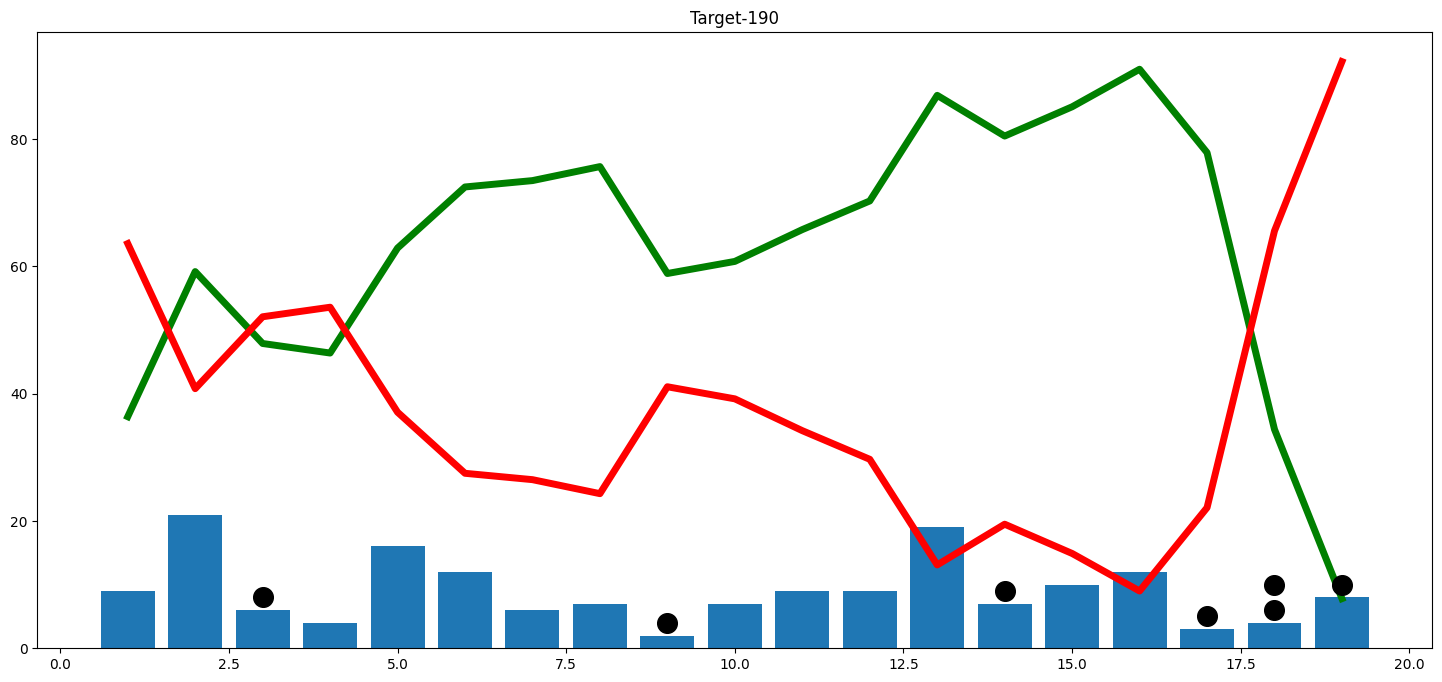

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(temp_df['end_of_over'], temp_df['win'], color='green', linewidth=5)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=5)
filtered_wickets = temp_df[temp_df['wickets_in_over'] >= 1]
for i in range(filtered_wickets.shape[0]):
    c=0
    for j in range(int(filtered_wickets.iloc[i]['wickets_in_over'])):
        plt.scatter(filtered_wickets.iloc[i]['end_of_over'], filtered_wickets.iloc[i]['runs_after_over']+c+2, color='black', s=200, zorder=2)
        c+=4
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], zorder=1)
plt.title('Target-' + str(target))
plt.show()


In [49]:
import joblib
joblib.dump(pipe, './cricketpred.pkl')

['./cricketpred.pkl']